In [546]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, Lasso, Ridge, RidgeCV, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.preprocessing import LabelEncoder, StandardScaler

import seaborn as sn #visual representation

from sklearn.preprocessing import StandardScaler, MinMaxScaler ## standrard scalig 
from sklearn.compose import ColumnTransformer

from sklearn import metrics

from sklearn.model_selection import train_test_split



In [547]:
# Import the file with pandas
df = pd.read_csv('lisbon-houses.csv.xls') 

# print the first lines
df.head(5)


,Id,Condition,PropertyType,PropertySubType,Bedrooms,Bathrooms,AreaNet,AreaGross,Parking,Latitude,Longitude,Country,District,Municipality,Parish,Price M2,Price
0,101,Used,Homes,Apartment,3,1,76,152,0,38.7792,-9.1186,Portugal,Lisboa,Lisboa,Olivais,2463,198000
1,102,Used,Homes,Duplex,5,3,190,380,0,38.7056,-9.1784,Portugal,Lisboa,Lisboa,Alcantara,3125,1270000
2,103,Used,Homes,Apartment,1,1,26,52,0,38.7058,-9.1639,Portugal,Lisboa,Lisboa,Estrela,4005,140000
3,104,Used,Homes,Apartment,5,4,185,370,0,38.7466,-9.1640,Portugal,Lisboa,Lisboa,Sao Domingos de Benfica,3412,995000
4,105,Used,Homes,Apartment,7,1,150,300,0,38.7323,-9.1287,Portugal,Lisboa,Lisboa,Arroios,3277,570000


In [548]:
df = df.drop(['Country', 'District','Municipality'], axis=1)
df = df.drop(['Id'], axis=1)

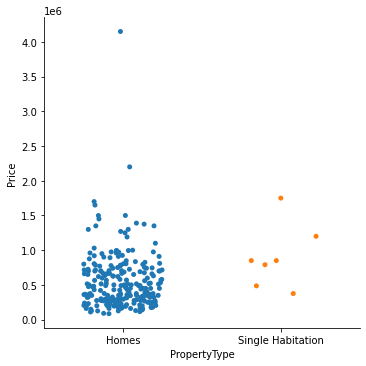

In [549]:
sn.catplot(x='PropertyType', y='Price',  data=df,jitter='0.25')

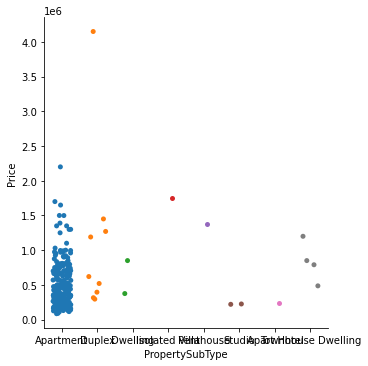

In [550]:
sn.catplot(x='PropertySubType', y='Price',  data=df,jitter='0.25')

In [551]:
df.shape

(246, 13)

In [552]:
df = df[df.PropertyType == 'Homes']
df = df.drop(['PropertyType'], axis=1)

df = df[df.PropertySubType == 'Apartment']
df = df.drop(['PropertySubType'], axis=1)

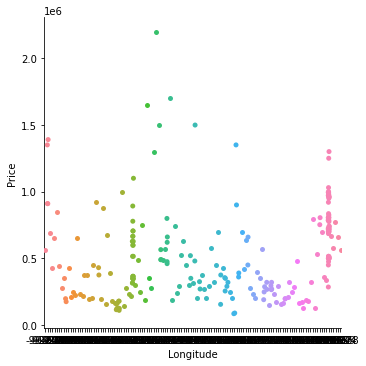

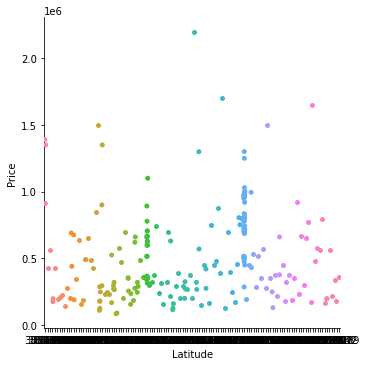

In [553]:
sn.catplot(x='Longitude', y='Price',  data=df,jitter='0.25')
sn.catplot(x='Latitude', y='Price',  data=df,jitter='0.25')

In [554]:
df = df.drop(['Longitude', 'Latitude'], axis=1)

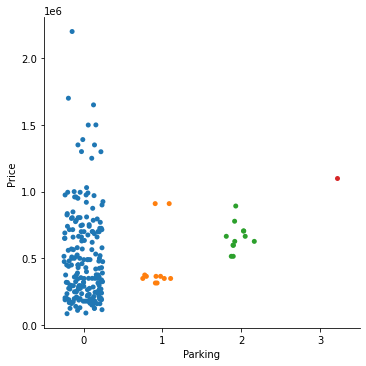

In [555]:
sn.catplot(x='Parking', y='Price',  data=df,jitter='0.25')

In [556]:
df['WithParking'] = np.where(df['Parking'] == '0', '0', '1')
df = df.drop(['Parking'], axis=1)

In [557]:
df.shape

(226, 9)

In [558]:
le=LabelEncoder()
df['Condition'] = le.fit_transform(df['Condition'])
df['Parish'] = le.fit_transform(df['Parish'])


In [559]:
df.head()

,Condition,Bedrooms,Bathrooms,AreaNet,AreaGross,Parish,Price M2,Price,WithParking
0,3,3,1,76,152,16,2463,198000,1
2,3,1,1,26,52,12,4005,140000,1
3,3,5,4,185,370,22,3412,995000,1
4,3,7,1,150,300,4,3277,570000,1
5,3,3,2,95,190,7,3542,425000,1


In [560]:
X_train, X_test = train_test_split(df, test_size=0.1,random_state=155)


In [561]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [562]:
X_test_scaled.head()

,Condition,Bedrooms,Bathrooms,AreaNet,AreaGross,Parish,Price M2,Price,WithParking
36,3,2,1,64,128,15,5112,190000,1
173,0,3,2,102,204,15,5112,525000,1
142,2,2,3,74,148,12,4005,490000,1
107,2,1,1,76,152,14,2881,515000,1
8,3,2,1,58,116,16,2463,196000,1


In [563]:
y_train = X_train_scaled["Price"].values
X_train_scaled = X_train_scaled.drop("Price", axis=1).values

y_test = X_test_scaled["Price"].values
X_test_scaled = X_test_scaled.drop("Price", axis=1).values

# #MODELS

Linear Regression

In [564]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled,y_train)
y_p=model_lr.predict(X_test_scaled)

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(df2.head(10))

print('R2- SCORE:', metrics.r2_score(y_test,y_p))
print('Loss:', metrics.mean_absolute_percentage_error(y_test,y_p))

   Actual      Predicted
0  190000  407572.371367
1  525000  612704.302587
2  490000  569272.696176
3  515000  349282.125273
4  196000  145085.849092
5  149500  215671.207216
6  199900  232396.323305
7  799000  817349.439906
8  245000  340649.713741
9  270000  202855.428432
R2- SCORE: 0.8005476905527744
Loss: 0.3533993101256391


Lasso

In [565]:
model_lasso = Lasso(alpha = 0.0001,tol=0.0001,fit_intercept=True, max_iter=100000)
model_lasso.fit(X_train_scaled,y_train)
y_pred = model_lasso.predict(X_test_scaled)


df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df2.head(10))

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))

   Actual      Predicted
0  190000  407572.371321
1  525000  612704.302838
2  490000  569272.695637
3  515000  349282.125151
4  196000  145085.849029
5  149500  215671.207197
6  199900  232396.323419
7  799000  817349.439966
8  245000  340649.714163
9  270000  202855.428311
R2- SCORE: 0.8005476904755124
MAPE: 0.35339931029656035


Ridge

In [566]:
model_ridge = Ridge(alpha = 0.0001, normalize = False,fit_intercept=False, tol = 0.001, \
              solver ='sag', random_state = 123)

model_ridge.fit(X_train_scaled, y_train)
y_pred=model_ridge.predict(X_test_scaled)


df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_p})
print(df2.head(10))

from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_p))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test,y_pred))

   Actual      Predicted
0  190000  407572.371367
1  525000  612704.302587
2  490000  569272.696176
3  515000  349282.125273
4  196000  145085.849092
5  149500  215671.207216
6  199900  232396.323305
7  799000  817349.439906
8  245000  340649.713741
9  270000  202855.428432
R2- SCORE: 0.8005476905527744
MAPE: 0.47081581286426255
